## **Picture Description Task**
**Data Loading and Preprocessing**

In [ ]:
!pip install python-igraph
!pip install python-igraph leidenalg cairocffi
!pip install pingouin
!pip install statannot

import igraph
import cairocffi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Northwell Pipelines/Statistics/dataframes/picture_graph_tlc.csv')

seq = ['seq_nn', 'seq_ne', 'seq_diameter', 'seq_aspl','seq_awd', 'seq_gd', 'seq_lscc','seq_lscc_z','seq_aspl_z']
w30 = ['w30_nn', 'w30_ne','w30_diameter', 'w30_aspl', 'w30_awd', 'w30_gd', 'w30_lscc','w30_lscc_z','w30_aspl_z']
ap = ['ap_nn', 'ap_ne','ap_diameter','ap_aspl', 'ap_awd', 'ap_gd','ap_lscc', 'ap_lscc_z','ap_aspl_z']
s2ap = ['s2_ap_nn', 's2_ap_ne', 's2_ap_diameter', 's2_ap_aspl','s2_ap_awd', 's2_ap_gd', 's2_ap_lscc','s2_ap_lscc_z', 's2_ap_aspl_z']

size = ['seq_nn', 'ap_nn', 'w30_nn', 's2_ap_nn', 
        'seq_ne', 'ap_ne', 'w30_ne', 's2_ap_ne',
        'seq_diameter',  'ap_diameter','w30_diameter', 's2_ap_diameter',
        'seq_aspl',  'ap_aspl', 'w30_aspl', 's2_ap_aspl', ]

connectedness = ['seq_awd','ap_awd' , 'w30_awd', 's2_ap_awd',
                 'seq_gd', 'ap_gd' , 'w30_gd', 's2_ap_gd',
                 'seq_lscc', 'ap_lscc','w30_lscc', 's2_ap_lscc']

organization = ['seq_lscc_z', 'ap_lscc_z', 'w30_lscc_z', 's2_ap_lscc_z',
                'seq_aspl_z', 'ap_aspl_z', 'w30_aspl_z', 's2_ap_aspl_z']

graph = ap + s2ap + seq + w30

demo = ['study','demo_age','demo_sex', 'demo_gender', 'demo_race','demo_education','demo_caregiver_education']
verbosity = ['word_count','sentence_count','mean_sentence_length']
sans = ['sans_global_asocanhed', 'sans_global_affect', 'sans_global_alogia', 'sans_global_avolition']
bprs = ['bprs_total','bprs_factor_anxdep' ,'bprs_factor_hostsus' ,'bprs_factor_thought', 'bprs_factor_withret']

df['speech disorganization'] = (df['tlc_d03pressure']+df['tlc_d05tangent']+df['tlc_d06derail']+df['tlc_d07incoh']+df['tlc_d08illogic']+df['tlc_d12circum']+df['tlc_d13lossgoal'])/7
df['speech poverty'] = (df['tlc_01povspeech']+df['tlc_02povcontent'])/2


language = ['speech disorganization','speech poverty']
severity = [ 'bprs_total']
dimension = ['bprs_factor_anxdep' ,'bprs_factor_hostsus' ,'bprs_factor_thought', 'bprs_factor_withret','sans_global_asocanhed', 'sans_global_affect', 'sans_global_alogia', 'sans_global_avolition']

clinical = language+severity+dimension
df = df[['uid','anypsychosis', 'group']+demo+verbosity+graph+clinical]

columns_update = {}
for fname in graph:
  a = fname.replace('_', ' ')
  b = a.replace('ap ', 's_ap ')
  b = b.replace('s2 s', 'd')
  b = b.replace('seq', 's_seq')
  b = b.replace('w30', 'd_seq')
  b = b.replace(' z', 'z')
  b = b.replace('gd', 'density')
  columns_update[fname] = b
columns_update['bprs_total'] = 'total bprs score' 
columns_update['bprs_factor_hostsus'] = 'hostility/suspiciousness'
columns_update['bprs_factor_thought'] = 'thought disturbance'
columns_update['bprs_factor_withret'] = 'withdrawal/retardation'
columns_update['sans_global_asocanhed'] = 'asociality/anhedonia'
columns_update['sans_global_affect'] = 'affect flattening'
columns_update['sans_global_alogia'] = 'global alogia'
columns_update['sans_global_avolition'] = 'avolition'
columns_update['bprs_factor_anxdep'] = 'anxiety/depression'
df = df.rename(columns=columns_update)

severity = [ 'total bprs score']
dimension = ['anxiety/depression' ,'hostility/suspiciousness' ,'thought disturbance', 'withdrawal/retardation','asociality/anhedonia', 'affect flattening', 'global alogia', 'avolition']

s_seq = ['s_seq nn', 's_seq ne', 's_seq diameter', 's_seq aspl','s_seq awd', 's_seq density', 's_seq lscc','s_seq lsccz','s_seq asplz']
d_seq = ['d_seq nn', 'd_seq ne','d_seq diameter', 'd_seq aspl', 'd_seq awd', 'd_seq density', 'd_seq lscc','d_seq lsccz','d_seq asplz']
s_ap = ['s_ap nn', 's_ap ne','s_ap diameter','s_ap aspl', 's_ap awd', 's_ap density','s_ap lscc', 's_ap lsccz','s_ap asplz']
d_ap = ['d_ap nn', 'd_ap ne', 'd_ap diameter', 'd_ap aspl','d_ap awd', 'd_ap density', 'd_ap lscc','d_ap lsccz', 'd_ap asplz']

size = ['s_seq nn', 's_ap nn', 'd_seq nn', 'd_ap nn', 
    's_seq ne', 's_ap ne', 'd_seq ne', 'd_ap ne',
    's_seq diameter', 's_ap diameter','d_seq diameter', 'd_ap diameter',
    's_seq aspl', 's_ap aspl', 'd_seq aspl', 'd_ap aspl', ]
connectedness = ['s_seq awd','s_ap awd' , 'd_seq awd', 'd_ap awd',
         's_seq density', 's_ap density' , 'd_seq density', 'd_ap density',
         's_seq lscc', 's_ap lscc','d_seq lscc', 'd_ap lscc']
organization = ['s_seq lsccz', 's_ap lsccz', 'd_seq lsccz', 'd_ap lsccz',
        's_seq asplz', 's_ap asplz', 'd_seq asplz', 'd_ap asplz']

semantic = s_ap+d_ap
structural = s_seq+d_seq
graph = s_ap + d_ap + s_seq + d_seq
clinical = language+severity+dimension

for index, row in df.iterrows():
  if row['group'] == 'SSD':
    df.at[index, 'ssd'] = 1
  else:
    df.at[index, 'ssd'] = 0
for index, row in df.iterrows():
  if row['anypsychosis'] == 1:
    df.at[index, 'Psychosis'] = "1"
  else:
    df.at[index, 'Psychosis'] = "0"

**Table 3 - Relationships Between Graph Features and Psychosis**

  Mann-Whitney U test

In [35]:
bonf = 0.05/144

for feature in graph:
  print(feature,'\n', pg.mwu(df.loc[df['anypsychosis'] == 1][feature].dropna(), df.loc[df['anypsychosis'] == 0][feature].dropna(), alternative='two-sided'))
  p = pg.mwu(df.loc[df['anypsychosis'] == 1][feature].dropna(), df.loc[df['anypsychosis'] == 0][feature].dropna(), alternative='two-sided')['p-val'].tolist()[0]
  if p < bonf:
    print('**Bonf Significant**')

s_ap nn 
       U-val alternative     p-val       RBC      CLES
MWU  4149.0   two-sided  0.035609  0.173835  0.413082
s_ap ne 
       U-val alternative    p-val       RBC      CLES
MWU  4056.0   two-sided  0.02006  0.192354  0.403823
s_ap diameter 
       U-val alternative     p-val       RBC      CLES
MWU  4238.5   two-sided  0.057661  0.156014  0.421993
s_ap aspl 
       U-val alternative     p-val       RBC      CLES
MWU  4454.0   two-sided  0.171723  0.113102  0.443449
s_ap awd 
       U-val alternative     p-val       RBC      CLES
MWU  4242.0   two-sided  0.060485  0.155317  0.422342
s_ap density 
       U-val alternative     p-val      RBC     CLES
MWU  5342.0   two-sided  0.441632 -0.06372  0.53186
s_ap lscc 
       U-val alternative     p-val       RBC      CLES
MWU  4265.0   two-sided  0.067029  0.150737  0.424632
s_ap lsccz 
       U-val alternative     p-val       RBC      CLES
MWU  6113.0   two-sided  0.008634 -0.217244  0.608622
s_ap asplz 
       U-val alternative     p-

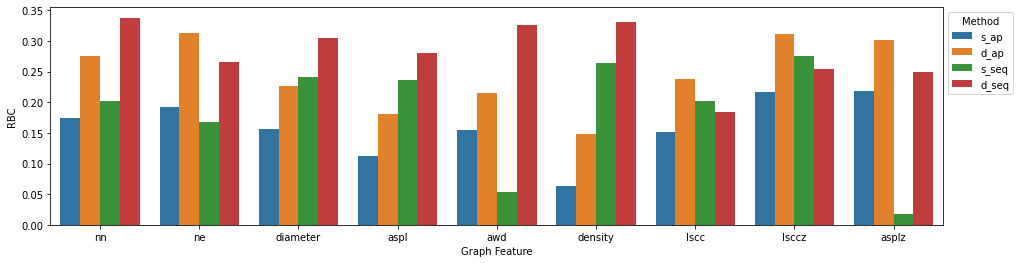

In [77]:
### Bar chart
barchart = pd.DataFrame(columns=('feature', 'Graph Feature', 'Method', 'RBC'))
index = 0
for feature in graph:
  rbc = abs(pg.mwu(df.loc[df['anypsychosis'] == 1][feature].dropna(), df.loc[df['anypsychosis'] == 0][feature].dropna(), alternative='two-sided')['RBC'].tolist()[0])
  method = feature.split(' ')[0]
  gfeat = feature.split(' ')[1]
  barchart.loc[index] = [feature, gfeat,method,rbc]  
  index += 1
barchart

f, ax = plt.subplots(figsize=(16, 4))

ax = sns.barplot(x="Graph Feature", y="RBC", hue="Method", data=barchart)
plt.legend(loc='upper right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Method')

plt.savefig('/content/drive/MyDrive/Northwell Pipelines/Statistics/picture_barplot.png', bbox_inches='tight', dpi=300)

In [114]:
### Matching for sex
df_np_m = df.loc[df['anypsychosis'] == 0].loc[df['demo_sex'] == 'Male']
df_np_f = df.loc[df['anypsychosis'] == 0].loc[df['demo_sex'] == 'Female'].sample(35 , replace=False, random_state=1)
df_p_m = df.loc[df['anypsychosis'] == 1].loc[df['demo_sex'] == 'Male'].sample(41, replace=False, random_state=1)
df_p_f = df.loc[df['anypsychosis'] == 1].loc[df['demo_sex'] == 'Female']
df_m_sex = pd.concat([df_np_m, df_np_f, df_p_m, df_p_f], ignore_index=True)

df_m_sex # n = 152

bonf = 0.05/144

for feature in graph:
  print(feature,'\n', pg.mwu(df_m_sex.loc[df_m_sex['anypsychosis'] == 1][feature].dropna(), df_m_sex.loc[df_m_sex['anypsychosis'] == 0][feature].dropna(), alternative='two-sided'))
  p = pg.mwu(df_m_sex.loc[df_m_sex['anypsychosis'] == 1][feature].dropna(), df_m_sex.loc[df_m_sex['anypsychosis'] == 0][feature].dropna(), alternative='two-sided')['p-val'].tolist()[0]
  if p < bonf:
    print('**Bonf Significant**')
  print('---')

s_ap nn 
       U-val alternative     p-val       RBC     CLES
MWU  2316.0   two-sided  0.035193  0.198061  0.40097
---
s_ap ne 
       U-val alternative     p-val       RBC     CLES
MWU  2316.0   two-sided  0.035203  0.198061  0.40097
---
s_ap diameter 
       U-val alternative     p-val       RBC      CLES
MWU  2498.0   two-sided  0.148532  0.135042  0.432479
---
s_ap aspl 
       U-val alternative     p-val       RBC      CLES
MWU  2555.0   two-sided  0.220483  0.115305  0.442348
---
s_ap awd 
       U-val alternative     p-val       RBC      CLES
MWU  2561.0   two-sided  0.228924  0.113227  0.443386
---
s_ap density 
       U-val alternative     p-val       RBC      CLES
MWU  3210.0   two-sided  0.236132 -0.111496  0.555748
---
s_ap lscc 
       U-val alternative     p-val       RBC      CLES
MWU  2543.5   two-sided  0.202029  0.119287  0.440357
---
s_ap lsccz 
       U-val alternative     p-val       RBC      CLES
MWU  3445.0   two-sided  0.040299 -0.192867  0.596434
---
s_ap aspl

In [115]:
###Matching for Race

for index, row in df.iterrows():
  if row['demo_race'] == 'Black':
    df.at[index,'race'] = 'AfricanAmerican'
  elif row['demo_race'] == 'White':
    df.at[index,'race'] = 'Caucasian'
  elif row['demo_race'] == 'Asian':
    df.at[index,'race'] = 'Asian'
  else:
    df.at[index,'race'] = 'Other'


df_np_af = df.loc[df['anypsychosis'] == 0].loc[df['race'] == 'AfricanAmerican']
df_np_as = df.loc[df['anypsychosis'] == 0].loc[df['race'] == 'Asian'].sample(11, replace=False, random_state=1)
df_np_ca = df.loc[df['anypsychosis'] == 0].loc[df['race'] == 'Caucasian'].sample(20, replace=False, random_state=1)
df_np_ot = df.loc[df['anypsychosis'] == 0].loc[df['race'] == 'Other'].sample(19,replace=False, random_state=1)
df_p_af = df.loc[df['anypsychosis'] == 1].loc[df['race'] == 'AfricanAmerican'].sample(22, replace=False, random_state=1)
df_p_as =df.loc[df['anypsychosis'] == 1].loc[df['race'] == 'Asian']
df_p_ca = df.loc[df['anypsychosis'] == 1].loc[df['race'] == 'Caucasian']
df_p_ot = df.loc[df['anypsychosis'] == 1].loc[df['race'] == 'Other']

df_m_race = pd.concat([df_np_af, df_np_as, df_np_ca,df_np_ot,df_p_af, df_p_as, df_p_ca,df_p_ot], ignore_index=True)
df_m_race # n = 144

bonf = 0.05/144

for feature in graph:
  print(feature,'\n', pg.mwu(df_m_race.loc[df_m_race['anypsychosis'] == 1][feature].dropna(), df_m_race.loc[df_m_race['anypsychosis'] == 0][feature].dropna(), alternative='two-sided'))
  p = pg.mwu(df_m_race.loc[df_m_race['anypsychosis'] == 1][feature].dropna(), df_m_race.loc[df_m_race['anypsychosis'] == 0][feature].dropna(), alternative='two-sided')['p-val'].tolist()[0]
  if p < bonf:
    print('**Bonf Significant**')
  print('---')

s_ap nn 
       U-val alternative    p-val       RBC      CLES
MWU  2082.5   two-sided  0.04196  0.196566  0.401717
---
s_ap ne 
       U-val alternative     p-val       RBC      CLES
MWU  2042.0   two-sided  0.028118  0.212191  0.393904
---
s_ap diameter 
       U-val alternative     p-val       RBC      CLES
MWU  2027.5   two-sided  0.023356  0.217785  0.391107
---
s_ap aspl 
       U-val alternative    p-val       RBC      CLES
MWU  2169.0   two-sided  0.09139  0.163194  0.418403
---
s_ap awd 
       U-val alternative     p-val      RBC      CLES
MWU  2187.0   two-sided  0.106053  0.15625  0.421875
---
s_ap density 
       U-val alternative     p-val       RBC      CLES
MWU  2814.0   two-sided  0.376152 -0.085648  0.542824
---
s_ap lscc 
       U-val alternative     p-val       RBC      CLES
MWU  2081.5   two-sided  0.040317  0.196952  0.401524
---
s_ap lsccz 
       U-val alternative    p-val       RBC      CLES
MWU  3184.0   two-sided  0.01811 -0.228395  0.614198
---
s_ap asplz 
 

**Figure 2 - A** (Bonferonni Survived Relations)

Text(0.5, 1.0, 'Picture Description Task\n')

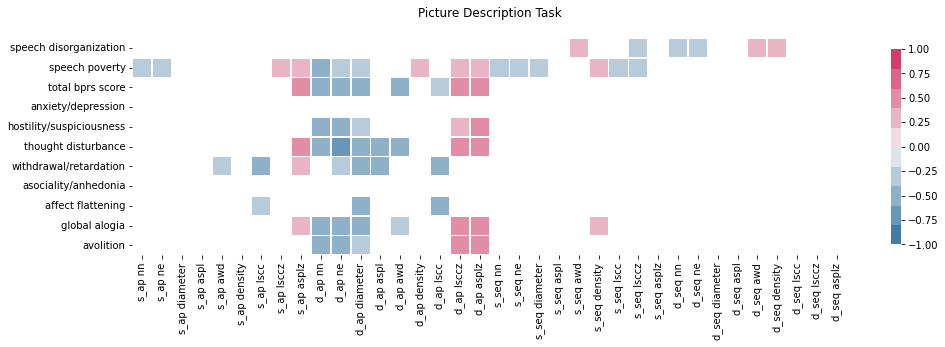

In [ ]:
df_corr = df[clinical+graph].copy()
corr = df_corr.corr(method='spearman')
corr = corr.iloc[0:11,11:]
bonf = len(graph) * len(clinical)
f, ax = plt.subplots(figsize=(16, 4))

cmap = sns.diverging_palette(240, 0, n=10)
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            df2 = df[[col,col2]].dropna().copy()
            _ , p = stats.spearmanr(df2[col],df2[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix


p_values = corr_sig(df_corr)
p_values = p_values[0:11,11:]
mask = np.invert(p_values<(0.0001)) 

sns.heatmap(corr,mask=mask,  cmap = cmap , fmt=".2", vmin=-1, vmax=1,center=0, linewidths=0.75, linecolor='white', cbar_kws={"shrink": 0.9}) #, #annot=True,
plt.title("Picture Description Task\n", fontsize =12)
#plt.savefig('/content/drive/MyDrive/Northwell Pipelines/Statistics/picture_heatmap.png', bbox_inches='tight', dpi=300)

**VIF Comparisons**

In [ ]:
#s_ap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF dataframe

s_ap = ['s_ap nn', 's_ap ne','s_ap diameter','s_ap aspl', 's_ap awd', 's_ap density','s_ap lscc', 's_ap lsccz','s_ap asplz']

s_ap_connectedness = [ 's_ap awd', 's_ap density','s_ap lscc']
s_ap_size = ['s_ap nn','s_ap aspl']
s_ap_organization = [ 's_ap lsccz']

s_ap = [ 's_ap density','s_ap lscc','s_ap aspl','s_ap lsccz']

vif_data = pd.DataFrame()
X = add_constant(df[s_ap].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,102.708606
3,s_ap aspl,4.412126
2,s_ap lscc,3.737210
4,s_ap lsccz,2.327042
1,s_ap density,1.364956


In [ ]:
d_ap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


d_ap = ['d_ap nn', 'd_ap ne', 'd_ap diameter', 'd_ap aspl','d_ap awd', 'd_ap density', 'd_ap lscc','d_ap lsccz', 'd_ap asplz']


# VIF dataframe

d_ap_size = ['d_ap nn', 'd_ap aspl']
d_ap_connectedness = ['d_ap awd', 'd_ap density', 'd_ap lscc']
d_ap_organization = [ 'd_ap asplz']

d_ap = ['d_ap aspl', 'd_ap density', 'd_ap lscc', 'd_ap asplz']

vif_data = pd.DataFrame()
X = add_constant(df[d_ap].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,291.236992
1,d_ap aspl,2.154951
3,d_ap lscc,1.989628
4,d_ap asplz,1.549011
2,d_ap density,1.091903


In [ ]:
#ap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# VIF dataframe

ap = ['d_ap aspl', 'd_ap density', 'd_ap lscc', 'd_ap asplz', 's_ap density','s_ap lscc']

vif_data = pd.DataFrame()
X = add_constant(df[ap].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,295.669762
3,d_ap lscc,2.373184
1,d_ap aspl,2.173159
6,s_ap lscc,1.859440
5,s_ap density,1.673679
2,d_ap density,1.580361
4,d_ap asplz,1.578799


In [ ]:
#s_seq
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF dataframe
s_seq = ['s_seq nn', 's_seq ne', 's_seq diameter', 's_seq aspl','s_seq awd', 's_seq density', 's_seq lscc','s_seq lsccz','s_seq asplz']


s_seq_size = ['s_seq ne','s_seq aspl']
s_seq_connectedness = ['s_seq awd', 's_seq density', 's_seq lscc']
s_seq_organization = ['s_seq lsccz','s_seq asplz']

s_seq = ['s_seq ne','s_seq aspl','s_seq awd', 's_seq density','s_seq lsccz']

vif_data = pd.DataFrame()
X = add_constant(df[s_seq].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,172.177749
2,s_seq aspl,3.355011
4,s_seq density,3.291797
1,s_seq ne,3.167469
5,s_seq lsccz,2.499197
3,s_seq awd,1.761749


In [ ]:
#d_seq
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


d_seq = ['d_seq nn', 'd_seq ne','d_seq diameter', 'd_seq aspl', 'd_seq awd', 'd_seq density', 'd_seq lscc','d_seq lsccz','d_seq asplz']

# VIF dataframe

d_seq_size = [ 'd_seq ne', 'd_seq aspl']
d_connectedness = ['d_seq awd', 'd_seq density', 'd_seq lscc']
d_seq = ['d_seq lsccz','d_seq asplz']

d_seq = ['d_seq awd', 'd_seq lsccz','d_seq asplz']

vif_data = pd.DataFrame()
X = add_constant(df[d_seq].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,51.364945
3,d_seq asplz,1.140315
2,d_seq lsccz,1.076405
1,d_seq awd,1.062195


In [ ]:
#seq


from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF dataframe

seq = ['s_seq ne', 's_seq density', 's_seq lsccz', 'd_seq awd', 'd_seq lsccz','d_seq asplz']

vif_data = pd.DataFrame()
X = add_constant(df[seq].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,105.891617
2,s_seq density,2.613354
1,s_seq ne,2.160573
3,s_seq lsccz,1.947704
6,d_seq asplz,1.794998
4,d_seq awd,1.235403
5,d_seq lsccz,1.089194


In [ ]:
#graph



#wseq
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF dataframe

graph = ['d_ap aspl', 'd_ap density', 'd_ap lscc', 'd_ap asplz','s_ap lscc', 's_seq ne', 's_seq density', 's_seq lsccz', 'd_seq awd', 'd_seq lsccz','d_seq asplz']

vif_data = pd.DataFrame()
X = add_constant(df[graph].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,480.492964
6,s_seq ne,3.260863
5,s_ap lscc,3.074477
7,s_seq density,2.880135
3,d_ap lscc,2.758197
1,d_ap aspl,2.621949
8,s_seq lsccz,2.067501
11,d_seq asplz,1.904419
4,d_ap asplz,1.650383
2,d_ap density,1.613478


**Figure 2-B**

In [ ]:
#graph
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF dataframe


graph2 = ['s_ap nn', 's_ap diameter', 's_ap lscc', 'd_ap aspl', 'd_ap density', 'd_ap lscc', 'd_ap asplz','s_seq awd', 's_seq density','s_seq lsccz', 'd_seq density', 'd_seq lscc','d_seq asplz']


vif_data = pd.DataFrame()
X = add_constant(df[graph2].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,651.766941
1,s_ap nn,4.465137
2,s_ap diameter,4.377154
11,d_seq density,4.311450
3,s_ap lscc,3.684832
13,d_seq asplz,3.433132
4,d_ap aspl,3.156832
9,s_seq density,3.144794
8,s_seq awd,2.928719
6,d_ap lscc,2.791036


In [ ]:
features_score = {}
features_df = []
graph2 = ['d_ap aspl', 'd_ap density', 'd_ap lscc', 'd_ap asplz','s_ap lscc', 's_seq ne', 's_seq density', 's_seq lsccz', 'd_seq awd', 'd_seq lsccz','d_seq asplz']

In [ ]:
### TLC

bonf = 0.0001


for measure in language:
  for feature in graph2:
    df_2 = df[[feature,measure]].dropna().copy()
    x = df_2[feature] 
    y = df_2[measure]
    rho,p = stats.spearmanr(x, y)
    if p < bonf:
      print(measure, ' n = ', len(df_2), feature,'p = ',p,'rho = ', rho)
      features_score[feature] = features_score.get(feature, 0) + 1
      features_df.append(['language','randomness', feature, measure, p, rho])

speech disorganization  n =  205 s_seq lsccz p =  1.0315508044994453e-05 rho =  -0.30263544993584124
speech disorganization  n =  189 d_seq awd p =  2.7790857836438284e-08 rho =  0.39048677857671793
speech poverty  n =  205 d_ap density p =  7.84322147183602e-06 rho =  0.3064866136220332
speech poverty  n =  200 d_ap asplz p =  5.284478779821714e-06 rho =  0.3156657592946299
speech poverty  n =  205 s_seq ne p =  6.729717279618134e-05 rho =  -0.27467588776490487
speech poverty  n =  205 s_seq density p =  8.619077210767995e-08 rho =  0.363283685809437
speech poverty  n =  205 s_seq lsccz p =  1.832386201996489e-05 rho =  -0.2943776045027482


In [ ]:
### Disease Severity


for measure in severity:
  for feature in graph2:
    df_2 = df[[feature,measure]].dropna().copy()
    x = df_2[feature] 
    y = df_2[measure]
    rho,p = stats.spearmanr(x, y)
    if p < bonf:
      print(measure, '\tn =', len(df_2), feature,'\tp =',p,'\trho =', rho)
      features_score[feature] = features_score.get(feature, 0) + 1
      features_df.append(['disease severity','randomness', feature, measure, p, rho])

total bprs score 	n = 100 d_ap lscc 	p = 7.524564099441834e-05 	rho = -0.3853476577987941
total bprs score 	n = 96 d_ap asplz 	p = 1.4831884642438681e-08 	rho = 0.5388476607075269


In [ ]:
#### Psychopathological Dimensions

for measure in dimension:
  for feature in graph2:
    df_2 = df[[feature,measure]].dropna().copy()
    x = df_2[feature] 
    y = df_2[measure]
    rho,p = stats.spearmanr(x, y)
    if p < bonf:
      print(measure, '\tn =', len(df_2), feature,'\tp =',p,'\trho =', rho)
      features_score[feature] = features_score.get(feature, 0) + 1
      features_df.append(['psychopathological dimension','randomness', feature, measure, p, rho])

hostility/suspiciousness 	n = 96 d_ap asplz 	p = 5.5444473379137655e-06 	rho = 0.44503524354048635
thought disturbance 	n = 100 d_ap aspl 	p = 3.900230858624095e-05 	rho = -0.3991199160913097
thought disturbance 	n = 96 d_ap asplz 	p = 2.487656436351054e-09 	rho = 0.562340596296237
withdrawal/retardation 	n = 100 d_ap aspl 	p = 1.577048783479522e-05 	rho = -0.41715456593469946
withdrawal/retardation 	n = 100 d_ap lscc 	p = 2.917319793078457e-06 	rho = -0.4482329105135258
withdrawal/retardation 	n = 100 s_ap lscc 	p = 1.2641519272619738e-06 	rho = -0.4625703039099576
affect flattening 	n = 100 d_ap lscc 	p = 7.070553594392162e-06 	rho = -0.4323110349216289
affect flattening 	n = 100 s_ap lscc 	p = 5.734349724760334e-05 	rho = -0.3911159426170466
global alogia 	n = 96 d_ap asplz 	p = 9.868474635096997e-06 	rho = 0.4342177097498357
global alogia 	n = 100 s_seq density 	p = 8.429680316502077e-05 	rho = 0.3829040541186627
avolition 	n = 96 d_ap asplz 	p = 2.326257226339205e-05 	rho = 0.4174

In [ ]:
features_df = pd.DataFrame(features_df, columns = ['domain','type', 'graph_feature', 'clinical_feature', 'p','rho'])
features_df['weight'] = abs(features_df['rho'])

features_df

,domain,type,graph_feature,clinical_feature,p,rho,weight
0,language,randomness,s_seq lsccz,speech disorganization,1.031551e-05,-0.302635,0.302635
1,language,randomness,d_seq awd,speech disorganization,2.779086e-08,0.390487,0.390487
2,language,randomness,d_ap density,speech poverty,7.843221e-06,0.306487,0.306487
3,language,randomness,d_ap asplz,speech poverty,5.284479e-06,0.315666,0.315666
4,language,randomness,s_seq ne,speech poverty,6.729717e-05,-0.274676,0.274676
5,language,randomness,s_seq density,speech poverty,8.619077e-08,0.363284,0.363284
6,language,randomness,s_seq lsccz,speech poverty,1.832386e-05,-0.294378,0.294378
7,disease severity,randomness,d_ap lscc,total bprs score,7.524564e-05,-0.385348,0.385348
8,disease severity,randomness,d_ap asplz,total bprs score,1.483188e-08,0.538848,0.538848
9,psychopathological dimension,randomness,d_ap asplz,hostility/suspiciousness,5.544447e-06,0.445035,0.445035


In [ ]:
g = igraph.Graph.DataFrame(features_df.iloc[0:,2:].drop('p',axis=1), directed=False)

for i in range(0,g.vcount()):
  if g.vs(i)["name"][0] in semantic:
    #print(g.vs(i)["name"])
    g.vs(i)["color"] = "dodgerblue"
  elif g.vs(i)['name'][0] in structural:
    g.vs(i)["color"] = "crimson"
  elif g.vs(i)['name'][0] in language:
    g.vs(i)["color"] = "orchid"
  elif g.vs(i)['name'][0] in severity:
    g.vs(i)["color"] = "webgreen"
  elif g.vs(i)['name'][0] in dimension:
    g.vs(i)["color"] = "salmon"

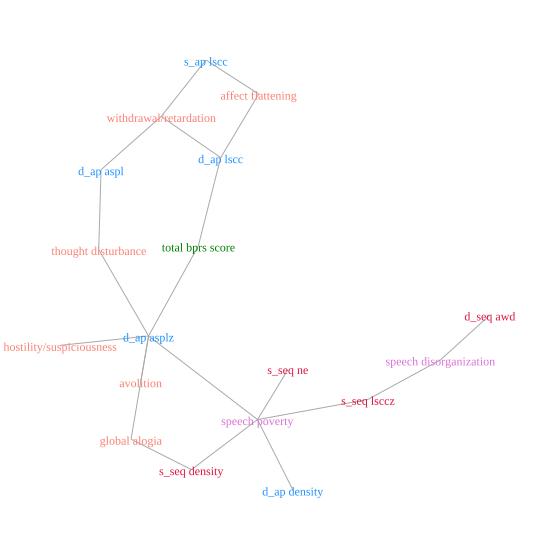

In [ ]:
color_list = ["dodgerblue", "crimson", "orchid","webgreen", "salmon", "green"]

visual_style = {}
visual_style["vertex_label"] = g.vs()["name"]
visual_style["vertex_size"] = 0
visual_style["vertex_font"] = "Times"
visual_style["vertex_label_size"] = 12
visual_style["vertex_label_color"] =  g.vs()["color"]
visual_style["layout"] = g.layout(layout='graphopt')
visual_style["bbox"] = (550, 550)
visual_style["margin"] = 60
visual_style["edge_width"] = 1 #g.es()["weight"]
visual_style["edge_color"] = 'darkgrey'
visual_style["edge_len"] = 1


igraph.plot(g, **visual_style)
igraph.plot(g,**visual_style, target='/content/drive/MyDrive/Northwell Pipelines/Statistics/picture_graph.png', dpi=1000)